In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime, timedelta
InteractiveShell.ast_node_interactivity = "all"
dataWalks = pd.read_csv("walks.csv")
dataWalkers = pd.read_csv("walkers.csv")
dataDemands = pd.read_csv("demands.csv")
df1 = pd.DataFrame(dataWalks)
df2 = pd.DataFrame(dataWalkers)
df3 = pd.DataFrame(dataDemands)



**a.	totalWalks i.	Total number of walks done by walker so far**

In [19]:
df1["checkintime"] = pd.to_datetime(df1["checkintime"])
totalWalks = df1.groupby("walkerid")["checkintime"].count().reset_index()
totalWalks.rename(columns={"checkintime": "totalWalks"}, inplace=True)
display(totalWalks)

,walkerid,totalWalks
0,00162fd3-21b4-4371-bebe-db6b081d86ef,6
1,0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1,5
2,00fef613-662c-4194-8de1-164942e25fb2,8
3,01adeee1-cb3d-46ff-9514-f4797299698c,5
4,01b0fb51-4461-4638-95a5-8fc8c0ef1c9d,2
...,...,...
1124,fe9bd5c2-c7fe-44c5-8013-457d693a3ec1,58
1125,febe2751-8999-4f61-8c61-a5108a2981b3,18
1126,ff665506-7322-4fcf-adef-0fdc52a8bd71,171
1127,ff709292-6ece-4d95-83d1-2b74aee65631,15


In [54]:
#display(totalWalks.max())
#display(totalWalks.sum())

topWalkers = totalWalks.sort_values(by="totalWalks", ascending=False).head(10)
display(topWalkers)


,walkerid,totalWalks
529,7594081d-eeef-41d3-b26e-c92e73c11863,595
411,5b9a6efe-4622-4cb0-a330-bb8494e81a77,532
827,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,429
51,0b887fa2-3016-4bdd-912f-e26e7bacb3c4,389
845,bc70410a-4d85-44b8-949f-7522643c173f,367
414,5c113c3d-80db-4119-8bc2-cc5672893219,363
437,6007a0a8-d40b-4560-9ead-180c1646dae5,274
182,28187ff8-9962-4918-833b-aff5e8aa2d4c,259
655,91b3ae1f-91ea-4c48-8f9e-3a9b6d1c7abd,255
914,cbdf5356-df86-4614-aa16-eae019d05508,252


1129 walkers made a total of 18329 different walks. The ID of the user who walked the most among the walkers is "7594081d-eeef-41d3-b26e-c92e73c11863" and she/he walked 595 times in total. This means that the walks taken by this walkers constitute 3.25 percent of all walks.




In [55]:
topWalker = df1[(df1["walkerid"] == "7594081d-eeef-41d3-b26e-c92e73c11863")]["district"].unique()
print(topWalker)

['Kadıköy']


The walker who walked the most walked only in Kadıköy.

<Axes: >

Text(0.5, 0, 'District')

Text(0, 0.5, 'Number of Walks')

Text(0.5, 1.0, 'Number of Walks in Each District')

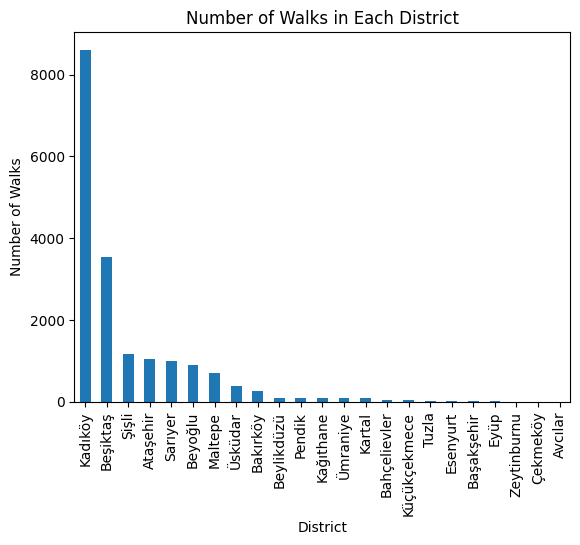

In [69]:
districtCounts = df1["district"].value_counts()
districtCounts.plot(kind="bar")
plt.xlabel("District")
plt.ylabel("Number of Walks")
plt.title("Number of Walks in Each District")
plt.show()

In [ ]:
'''
totalWalksinKadıkoy = districtCounts.get("Kadıköy")
display(totalWalksinKadıkoy)

totalWalksinBesiktas = districtCounts.get("Beşiktaş")
display(totalWalksinBesiktas)

totalWalksinAvcilar = districtCounts.get("Avcılar")
display(totalWalksinAvcilar)

totalWalksinCekmekoy = districtCounts.get("Çekmeköy")
display(totalWalksinCekmekoy)
'''

8607 of the 18329 walks, that is, 46.96%, were held in Kadıköy. Thus, Kadıköy became the district where dogs were walked the most. Avcılar and Çekmeköy were described as the districts with the least number of walks, with only two walks each.

**b.	firstWalk
i.	First walk date of walker**

In [27]:
firstWalk = df1.groupby("walkerid")["checkintime"].min()
df1["firstWalk"] = firstWalk
display(firstWalk)


walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef   2020-11-09 04:30:00.000
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1   2020-11-04 12:34:54.410
00fef613-662c-4194-8de1-164942e25fb2   2019-12-16 11:00:00.000
01adeee1-cb3d-46ff-9514-f4797299698c   2021-01-22 16:29:00.775
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d   2020-03-10 11:15:00.000
                                                 ...          
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1   2020-10-31 19:00:00.000
febe2751-8999-4f61-8c61-a5108a2981b3   2020-11-01 15:30:00.000
ff665506-7322-4fcf-adef-0fdc52a8bd71   2019-09-14 09:00:00.000
ff709292-6ece-4d95-83d1-2b74aee65631   2020-03-02 03:15:00.000
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2   2020-09-22 17:30:00.000
Name: checkintime, Length: 1129, dtype: datetime64[ns]

**c.	lastWalk
i.	Last walk date of walker**


In [29]:
lastWalk = df1.groupby("walkerid")["checkintime"].max()
df1["lastWalk"] = lastWalk
display(lastWalk)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef   2020-11-30 04:30:00
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1   2020-11-20 10:30:00
00fef613-662c-4194-8de1-164942e25fb2   2020-01-15 11:00:00
01adeee1-cb3d-46ff-9514-f4797299698c   2021-02-11 11:00:00
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d   2020-03-12 12:00:00
                                               ...        
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1   2021-02-25 05:00:00
febe2751-8999-4f61-8c61-a5108a2981b3   2021-02-23 06:00:00
ff665506-7322-4fcf-adef-0fdc52a8bd71   2021-02-25 15:45:00
ff709292-6ece-4d95-83d1-2b74aee65631   2020-03-27 03:45:00
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2   2020-09-23 17:30:00
Name: checkintime, Length: 1129, dtype: datetime64[ns]

**d.	signupTime
i.	The date that walker signs up in app**


In [31]:
signuptime = df2[["id", "signuptime"]]
display(signuptime)

,id,signuptime
0,248b0c40-6670-47e1-be2d-052934fac3ea,2019-11-03 22:01:38.006
1,01029542-74c8-4ba7-9370-c63d0eab244d,2020-02-11 15:30:28.371
2,d6d71172-a808-420e-9856-3dd0a067318b,2019-11-06 09:47:58.777
3,7f6a0cfd-b94d-4bb6-9db8-d7c28eb03e7b,2020-10-12 11:38:52.230
4,fb487092-7521-4cb4-b102-a24cd337da54,2020-11-24 13:29:52.648
...,...,...
725,8ec22b8d-0e4e-433b-92bc-29495f0b8680,2019-03-12 08:18:41.605
726,47f70e45-5b0c-4789-b9ed-10aec14125dc,2019-04-10 10:01:26.674
727,3aff1e71-d407-471d-aa41-4847a4464aa4,2019-01-02 17:01:56.931
728,a5006ac2-b567-48ae-bddf-f06e371c5108,2019-01-02 16:57:38.020


**e.	didDemandOrWalk                       
i.	Whether the walker did a walk or demand after his/her signup
ii.	Label: Yes/No**

In [72]:
df = pd.merge(df1, df2, left_on="walkerid", right_on="id", how="right")
df["didDemandOrWalk"] = df["checkintime"].apply(lambda x: "Yes" if not pd.isna(x) else "No")
display(df["didDemandOrWalk"])

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
7143    Yes
7144    Yes
7145    Yes
7146    Yes
7147     No
Name: didDemandOrWalk, Length: 7148, dtype: object

6773

375

<Axes: ylabel='didDemandOrWalk'>

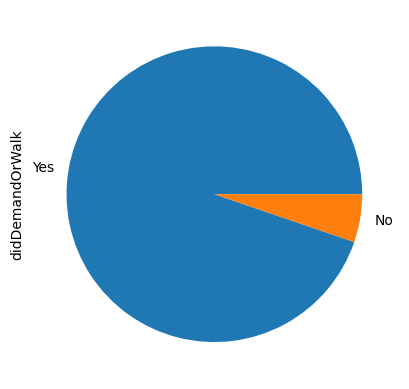

In [75]:
display((df["didDemandOrWalk"] == "Yes").sum())
display((df["didDemandOrWalk"] == "No").sum())

display(df["didDemandOrWalk"].value_counts().plot.pie())

While 6773 of 7148 walkers went for a walk after registering with the DogGo application, 375 walkers never went for a walk. In other words, approximately 95% of walkers went for a walk.

**f.	lifetime
i.	Date difference between signuptime and lastWalk (unit: Days)**


In [89]:
df["signuptime"] = pd.to_datetime(df["signuptime"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
lifetime = (df["checkintime"].max() - df["signuptime"]).dt.days
df["lifetime"] = lifetime
display(df["lifetime"])

0       480
1       381
2       478
3       137
4       137
       ... 
7143    785
7144    785
7145    785
7146    785
7147      5
Name: lifetime, Length: 7148, dtype: int64

In [88]:
#print(df["lifetime"].min())
#print(df["lifetime"].max())


According to the data, among the users there are users who registered with the application and used it for a maximum of 786 days.

(array([ 543., 1022.,  361.,  602., 1178., 2341.,  498.,  603.]),
 array([  0.  ,  98.25, 196.5 , 294.75, 393.  , 491.25, 589.5 , 687.75,
        786.  ]),
 <BarContainer object of 8 artists>)

Text(0.5, 0, 'Lifetime (Days)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of User Lifetime')

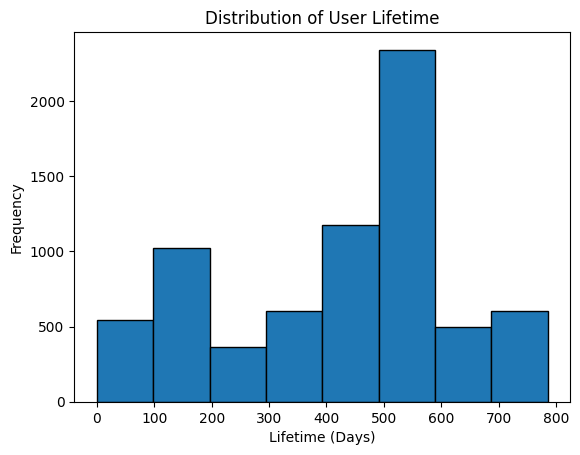

In [96]:
plt.hist(df["lifetime"], bins=8, edgecolor="k")
plt.xlabel("Lifetime (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of User Lifetime")
plt.show()

It is a non-symmetric distribution. Most of the users use the application for 500 to 600 days.

**g.	averageLifetime
i.	The tag that walker is in the app more or less than average of all walkers
ii.	Label: Less/More**


In [97]:
averageLifetime = lifetime.mean()
df["averageLifetime"] = "More"
df.loc[df["walkerid"].count() < averageLifetime, "averageLifetime"] = "Less"
display(df["averageLifetime"])

0        Less
1        More
2        More
3        More
4        More
         ... 
7144     More
7145     More
7146     More
7147     More
False    Less
Name: averageLifetime, Length: 7149, dtype: object

2


<Axes: ylabel='averageLifetime'>

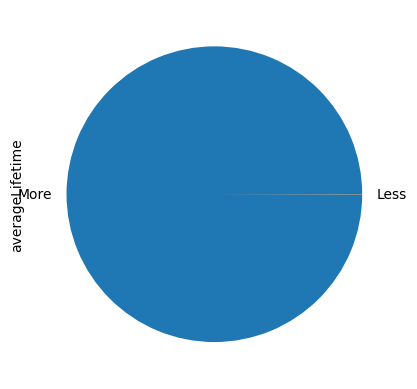

In [100]:
#print((df["averageLifetime"] == "More").sum())
print((df["averageLifetime"] == "Less").sum())

display(df["averageLifetime"].value_counts().plot.pie())

While 4394 walkers walked more than the average of all walkers on the app, 2754 walkers walked less than the average user. It means that approximately 61.5% users walked more than the average user.

**h.	averageWalk
i.	The tag that walker is done more or less walks than average of all walkers done. Compare walker total the walk count with average of all walkers
ii.	Label: Less/More**

In [102]:
'''
averageWalk = totalWalks.mean()
df["averageWalk"] = "More"
df.loc[df["totalWalks"] < averageWalk, "averageWalk"] = "Less"
print(df["averageWalk"])
'''

'\naverageWalk = totalWalks.mean()\ndf["averageWalk"] = "More"\ndf.loc[df["totalWalks"] < averageWalk, "averageWalk"] = "Less"\nprint(df["averageWalk"])\n'

**i.	firstWalkAfterSignup
i.	Date difference between walker’s signup date and first walk date (Unit: Days)**

In [103]:
df["signuptime"] = pd.to_datetime(df["signuptime"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
firstWalkAfterSignup = (df["signuptime"] - df["checkintime"].min()).dt.days
df["firstWalkAfterSignup"] = firstWalkAfterSignup
display(firstWalkAfterSignup)

0        304.0
1        403.0
2        306.0
3        647.0
4        647.0
         ...  
7144      -1.0
7145      -1.0
7146      -1.0
7147     779.0
False      NaN
Name: signuptime, Length: 7149, dtype: float64

**j.	firstWalkinWeek
i.	The tag whether the walker walked in his first week in the application**

In [104]:
'''
df["one_week_after_signed"] = df["signuptime"] + pd.Timedelta(days=7)
df["one_week_after_signed"] = pd.to_datetime(df["one_week_after_signed"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
df["firstWalkinWeek"] = "No"
df.loc[df["checkintime"].min() <= df["one_week_after_signed"], "firstwalkinWeek"] = "Yes"
df.drop(columns=["one_week_after_signed"], inplace=True)
display(df["firstWalkinWeek"])
'''

'\ndf["one_week_after_signed"] = df["signuptime"] + pd.Timedelta(days=7)\ndf["one_week_after_signed"] = pd.to_datetime(df["one_week_after_signed"])\ndf["checkintime"] = pd.to_datetime(df["checkintime"])\ndf["firstWalkinWeek"] = "No"\ndf.loc[df["checkintime"].min() <= df["one_week_after_signed"], "firstwalkinWeek"] = "Yes"\ndf.drop(columns=["one_week_after_signed"], inplace=True)\nprint(df["firstWalkinWeek"])\n'

In [105]:
#print((df["firstWalkinWeek"] == 'Yes').sum())
#print((df["firstWalkinWeek"] == 'No').sum())

**k.	lastMonthWalks
i.	Number of walks done by walker in last 30 days**

In [122]:
df["checkintime"] = pd.to_datetime(df["checkintime"])
today = "26.02.2021 17:45:00"
today = pd.to_datetime(today)
thirty_days_ago = today - timedelta(days=30)
recent_walks = df[df["checkintime"] >= thirty_days_ago]
lastMonthWalks = recent_walks.groupby("walkerid").size().reset_index(name="lastMonthWalks")
display(lastMonthWalks)

,walkerid,lastMonthWalks
0,09e59ced-1172-4744-a2bb-eb68ae83041c,5
1,0ab3e600-4f94-424c-9b83-f605d72476c4,15
2,1397c1a3-2af9-41c4-b691-890638e7d84c,5
3,174c9266-15a9-4c28-b6ba-8cc00f051620,2
4,1a997b08-8c03-4970-a63c-faeebddd0539,18
5,244818e0-34a4-4090-8c7e-fa3999acfd7b,19
6,2681ed5a-8ff7-415f-bd17-0717e7c40f49,1
7,2ca0f63e-16f1-44d6-9b82-2c24977581e4,1
8,33ce0158-cf03-489c-8421-1a59759f4b8c,24
9,39366a5d-7831-4161-9798-15ebfc181338,4


In [126]:
lastMonthWalks = lastMonthWalks.sort_values(by="lastMonthWalks", ascending=False)
display(lastMonthWalks)

,walkerid,lastMonthWalks
24,7594081d-eeef-41d3-b26e-c92e73c11863,32
42,c01159d8-394e-4b76-92cf-2084a85fb69a,31
19,5e2470c2-982c-48bb-b006-d52332b0bac9,29
40,b93995d2-ae36-4445-a3f2-a4c49b13bde1,29
14,5376ecf7-6f46-4060-bc8e-894e690b2fa8,27
17,5b9a6efe-4622-4cb0-a330-bb8494e81a77,26
8,33ce0158-cf03-489c-8421-1a59759f4b8c,24
16,54f3ee6f-ec65-40c0-a76d-903584eabb7a,20
5,244818e0-34a4-4090-8c7e-fa3999acfd7b,19
4,1a997b08-8c03-4970-a63c-faeebddd0539,18


The user with ID "7594081d-eeef-41d3-b26e-c92e73c11863" has walked a total of 32 times in the last 30 days, becoming the walker who walked the most in the last 30 days.

<BarContainer object of 55 artists>

Text(0.5, 0, 'Walker ID')

Text(0, 0.5, 'Number of Walks in Last Month')

Text(0.5, 1.0, 'Number of Walks in Last Month by Walker')

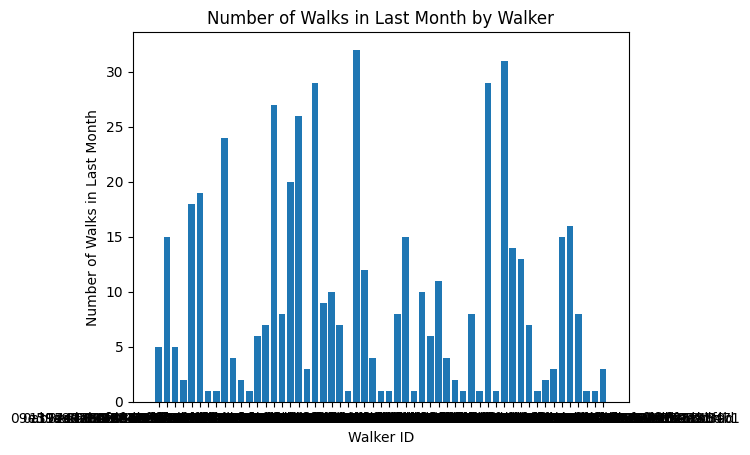

In [120]:
plt.bar(lastMonthWalks["walkerid"], lastMonthWalks["lastMonthWalks"])
plt.xlabel("Walker ID")
plt.ylabel("Number of Walks in Last Month")
plt.title("Number of Walks in Last Month by Walker")
plt.show()

**l.	activityTag
i.	The tag that measures walker’s activity
ii.	Whether the walker made a demand or walk in last 30 days**

In [109]:
today = "26.02.2021 17:45:00"
today = pd.to_datetime(today)
thirty_days_ago = today - timedelta(days=30)
df["checkintime"] = pd.to_datetime(df["checkintime"])
df["activityTag"] = "Inactive"
df.loc[df["checkintime"] >= thirty_days_ago, "activityTag"] = "Active"
df.loc[df["checkintime"] <= today, "activityTag"] = "Active"
display(df["activityTag"])


0        Inactive
1        Inactive
2        Inactive
3          Active
4          Active
           ...   
7144       Active
7145       Active
7146       Active
7147     Inactive
False    Inactive
Name: activityTag, Length: 7149, dtype: object

Axes(0.22375,0.11;0.5775x0.77)


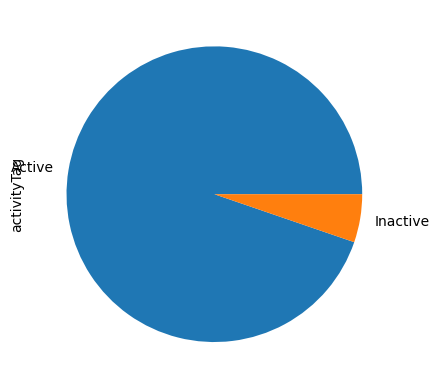

In [110]:
#print((df["activityTag"] == "Active").sum())
#print((df["activityTag"] == "Inactive").sum())

print(df["activityTag"].value_counts().plot.pie())

While 6773 walkers walked, 375 walkers did not walk  in last 30 days.

**m.	differentDistrictCount
i.	unique distinct number of districts that walker walked**

In [112]:
differentDistrictCount  = df.groupby("walkerid")["district"].nunique()
df["differentDistrictCount"] = differentDistrictCount
display(differentDistrictCount)

walkerid
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d    1
01d9cdcd-c770-4d29-8ca5-dd0770962b67    1
01fa4741-4138-472b-bdb6-d1f19fd2f44a    1
03b85e74-989f-4cf2-993f-d8411de50e3a    2
045cc0a5-afb1-4caa-9575-7faf6d3e1f69    2
                                       ..
fc597c8e-65bc-48f6-b5d9-b372238cd94d    2
fd1c862f-25a6-4051-a9b5-2776fb28345e    1
fde176dc-7f6b-408f-8c3e-6835b651d5ba    2
ff665506-7322-4fcf-adef-0fdc52a8bd71    3
ff709292-6ece-4d95-83d1-2b74aee65631    2
Name: district, Length: 355, dtype: int64

In [135]:
filteredCounts = differentDistrictCount[differentDistrictCount >= 5].count()
display(filteredCounts)

8

Only 8 walkers walked in 5 or more district.

**n.	activeLifeTime
i.	time difference between last walk or last demand (later one) and fist walk of walker (last walk/ last demand - first walk)**

In [147]:
lastWalk = pd.to_datetime(lastWalk)
firstWalk = pd.to_datetime(firstWalk)
activeLifeTime = lastWalk - firstWalk
df["activeLifeTime"] = activeLifeTime
activeLifeTime = activeLifeTime.sort_values(ascending=False)
display(activeLifeTime)


walkerid
d53dcc6a-3c30-4a7a-ae76-64e410224c12          772 days 23:30:00
91b3ae1f-91ea-4c48-8f9e-3a9b6d1c7abd          699 days 18:30:00
830e1b08-e678-464d-ba3c-c8949aae2bbd          692 days 00:00:00
237b4d88-0d2c-4889-9972-7b2ea4360a1e   685 days 19:36:58.163000
bc70410a-4d85-44b8-949f-7522643c173f          660 days 05:45:00
                                                 ...           
bcb22869-d162-4581-b195-0efdd88a94d8            0 days 00:00:00
42ccded4-4cdf-4a7f-aa82-3729ec485dfb            0 days 00:00:00
bb9a77ac-39b1-4b9e-98d0-dad21ecc8fab            0 days 00:00:00
820f43de-5db0-413c-9f4c-e2be746a6c00            0 days 00:00:00
c40c2d15-8c03-4f0b-957d-b91a49332529            0 days 00:00:00
Name: checkintime, Length: 1129, dtype: timedelta64[ns]

There are almost 773 days between the first time a walker with id "d53dcc6a-3c30-4a7a-ae76-64e410224c12" walks and the last time s/he walks.

**o.	totalActiveDayCount
i.	total number of walk day: number of days that walker has walking**

In [114]:
totalActiveDayCount = df.groupby("walkerid")["checkintime"].nunique()
df["totalActiveDayCount"] = totalActiveDayCount
display(totalActiveDayCount)

walkerid
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d      2
01d9cdcd-c770-4d29-8ca5-dd0770962b67      3
01fa4741-4138-472b-bdb6-d1f19fd2f44a      1
03b85e74-989f-4cf2-993f-d8411de50e3a      4
045cc0a5-afb1-4caa-9575-7faf6d3e1f69     18
                                       ... 
fc597c8e-65bc-48f6-b5d9-b372238cd94d      5
fd1c862f-25a6-4051-a9b5-2776fb28345e      2
fde176dc-7f6b-408f-8c3e-6835b651d5ba     23
ff665506-7322-4fcf-adef-0fdc52a8bd71    169
ff709292-6ece-4d95-83d1-2b74aee65631     15
Name: checkintime, Length: 355, dtype: int64

**p.	walkFrequency
i.	activeLifeTime/totalActiveDayCount**

In [115]:
from IPython.core.display import display_svg
walkFrequency = activeLifeTime/totalActiveDayCount
df["walkFrequency"] = walkFrequency
display(walkFrequency)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef                         NaT
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1                         NaT
00fef613-662c-4194-8de1-164942e25fb2                         NaT
01adeee1-cb3d-46ff-9514-f4797299698c                         NaT
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d             1 days 00:22:30
                                                  ...           
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1                         NaT
febe2751-8999-4f61-8c61-a5108a2981b3                         NaT
ff665506-7322-4fcf-adef-0fdc52a8bd71   3 days 03:18:22.366863905
ff709292-6ece-4d95-83d1-2b74aee65631             1 days 16:02:00
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2                         NaT
Name: checkintime, Length: 1129, dtype: timedelta64[ns]

**q.	dailyWalkAverage
i.	totalWalk/totalActiveDayCount**

In [ ]:
'''
dailyWalkAverage = totalWalks/totalActiveDayCount
print(dailyWalkAverage)
'''

**r.	walksWithNoDemands
i.	Find walks done without any demand**

In [116]:
df4 = pd.merge(df1, df3, on="walkerid", how="outer")
walksWithNoDemands = df4[df4["demandtime"].isnull()]
display(walksWithNoDemands)

,Unnamed: 0,ownerid_x,walkid,walkerid,walkingid,dogid_x,walkingtype,duration,checkintime,distance,...,ispreferred,matchingid,ownerid_y,servicetype,walkerdistrict,walkerneighborhood,walkerdograteresponse,walkergeo,walkergroup,walkerrateresponse
173346,7.0,e67b36e4-8b73-4ac6-9503-9e2fba8a177d,0daeee3e-ef24-4fb0-96bb-a77ac647825e,7f3f00c5-0f59-4e67-b7eb-bf508a19d913,367dfeff-cc29-4967-a394-46b22ce454a5,3148ded2-e1e2-4fe6-b9a1-6b5eaee397a0,Customize,45.0,2020-02-04 07:00:00.000,2.170855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173347,16529.0,e67b36e4-8b73-4ac6-9503-9e2fba8a177d,7de2b1a2-c69f-4128-8eee-0a51537570eb,7f3f00c5-0f59-4e67-b7eb-bf508a19d913,367dfeff-cc29-4967-a394-46b22ce454a5,3148ded2-e1e2-4fe6-b9a1-6b5eaee397a0,Customize,45.0,2020-02-03 11:00:00.000,2.528564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174903,11.0,3bede1b6-0498-437b-a50a-f86e1fc8c938,51183f4e-4667-4675-b10f-7bb5424c146b,f12c75c0-6895-4322-b771-7e27b0be5448,4d029619-4521-42bd-ad96-7397cd4f2f7b,0e16cfb0-d6a3-4091-823c-d219f5ab7f06,Planned,45.0,2019-02-10 07:00:00.000,1.485090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174904,70.0,6d643c76-109f-4b3e-a09e-1b8f55d3b11d,04ab50b0-5cf7-4391-a129-7217b1c08291,f12c75c0-6895-4322-b771-7e27b0be5448,9f461af3-fd13-4232-9546-3c475cebd0ae,00da6d22-589b-4ff9-a4d6-6a185997acd9,Package,45.0,2019-07-10 15:00:00.000,0.140430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174905,122.0,e61db060-7c7d-4b6c-bad0-485943233732,5bd8868d-6a8d-482c-9d62-8b8cc6edd060,f12c75c0-6895-4322-b771-7e27b0be5448,7d91baf8-dd83-4404-a2f3-63db65be8d4d,87a40433-6541-4628-91a2-d499f2b9cd88,Planned,45.0,2019-08-01 06:00:00.000,0.291551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384134,17916.0,4192aad1-d1df-4e0b-8515-a281b5555753,7f6c4116-e430-40a4-bd4f-a419b9affe9a,33c6c19e-e735-444a-bcaf-4914abd7ef41,f1bb779a-ba80-4ace-a0d4-6db4ca5333d4,3e0731c9-7bbb-4d9e-ae8b-58f81cda7b59,Package,45.0,2019-01-10 17:00:00.000,2.623808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384135,17927.0,6c6b9a63-8f1e-4c28-b951-c92ea111bc24,73d217b7-8a03-4a8b-837b-37765fe989ff,9db80134-a7eb-4c85-a6f7-88ddfa3f0da6,3ba96442-d1b3-4ab3-a1f1-365a8c307957,11a4799c-398d-44e8-8321-9c546d56e9f9,Package,45.0,2019-08-27 08:00:00.000,1.211558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384136,18018.0,43b72967-b365-4d81-a283-4f77c5662f68,490069f6-8381-4232-abe5-60aea915cd10,db512508-e038-4e73-b7e2-9b4e681225b1,71d52aa0-8a88-4f0c-8aee-25ae698386f6,9dc9b910-4d9e-4d8d-acc1-2c7b36974cfa,AdHoc,45.0,2020-02-29 19:07:48.931,65.670114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384137,18021.0,6777f900-bd9f-4ced-bb8c-943260a812ab,bfc9e03d-c06e-4b5b-b5e8-73e7abf32869,c3b07f44-5b82-4877-8c57-3eb35f033fe0,9e32991e-0611-4a47-bdb5-69804fcecf38,c6fb70d0-3df6-4bdd-b4b3-e532718c1911,AdHoc,45.0,2020-02-21 18:51:31.563,0.505226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**s.	totalDemandCount**

In [117]:
totalDemandCount = df3["demandtime"].notnull().sum()
display(totalDemandCount)

22802

**t.	last30DaysDemandCount**

In [118]:
df3["demandtime"] = pd.to_datetime(df3["demandtime"])
last_30_days_demand = df3[df3["demandtime"] >= thirty_days_ago]
last30DaysDemandCount = len(last_30_days_demand)
display(last30DaysDemandCount)

2414

2414 of 22802 demands were made in the last 30 days. This equals approximately 10.5%.

**u.	weeklyAverageDemandCount**

In [140]:
df3["demandtime"] = pd.to_datetime(df3["demandtime"])
df3["week_number"] = df3["demandtime"].dt.strftime("%U")
weeklyAverageDemandCount = df3.groupby("week_number").size().mean()
display(weeklyAverageDemandCount)

633.3888888888889